實作說明：
嘗試至少以下述方式之一(或用其他方式)提高正確率，以Matplotlib loss/accuracy 圖示之 

Dropout Rate(目前 0.2)

Batch Normalization (API?)

Kernel Size (目前 3 x 3)

Activation Function (目前 Relu)

Optimization: (目前 adam)

In [17]:
# Install TensorFlow
#!pip install -q tensorflow-gpu==2.3.0

In [18]:
#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.7.0


In [19]:
# 更多輸入

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [20]:
# 載入影像
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [21]:
# (28x28)乃 2D!
# convolution 需要 height x width x color 我們得 expand_dims
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [22]:
# 共有多少種物品
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [23]:
# 使用 函數式接口 functional API 建模
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.1)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [24]:
# your improved model code here to replace the above one

In [25]:
# 編譯與訓練
# 請確認用GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5037 - accuracy: 0.8146 - val_loss: 0.3839 - val_accuracy: 0.8569
Epoch 2/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3453 - accuracy: 0.8719 - val_loss: 0.3299 - val_accuracy: 0.8767
Epoch 3/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2946 - accuracy: 0.8880 - val_loss: 0.3352 - val_accuracy: 0.8787
Epoch 4/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2579 - accuracy: 0.9033 - val_loss: 0.2982 - val_accuracy: 0.8935
Epoch 5/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2324 - accuracy: 0.9119 - val_loss: 0.3001 - val_accuracy: 0.8894
Epoch 6/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2083 - accuracy: 0.9210 - val_loss: 0.3052 - val_accuracy: 0.8975
Epoch 7/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1884 - accuracy: 0.9280 - val_loss: 0.3053 - val_ac

In [26]:
#your improved optimization code here to replace the above one

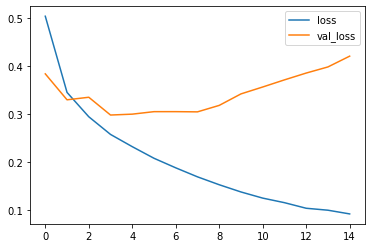

In [27]:
# 繪出迭代損失
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

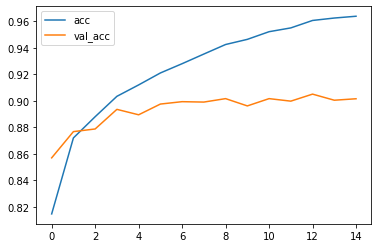

In [28]:
# 繪出迭代精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[878   1  30  14   4   1  69   0   3   0]
 [  5 975   1  15   2   0   0   0   2   0]
 [ 16   0 898   9  43   0  31   0   3   0]
 [  9   3  25 897  39   2  24   0   1   0]
 [  2   2  82  21 849   0  43   0   1   0]
 [  0   0   0   1   0 978   0  19   0   2]
 [131   1  85  24 107   2 636   0  14   0]
 [  0   0   0   0   0  14   0 961   0  25]
 [  3   0   3   3   3   4   4   0 980   0]
 [  1   0   0   0   0   8   0  26   2 963]]


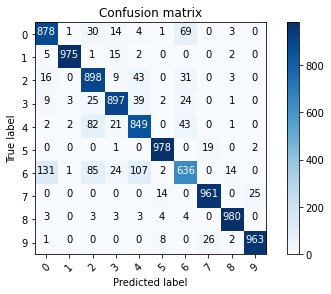

In [29]:
# 繪出混淆矩陣
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [30]:
# 映射標籤
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

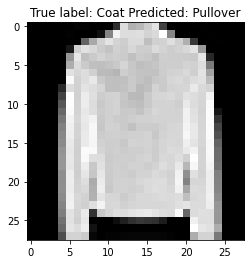

In [31]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));